- https://towardsdatascience.com/how-to-train-a-custom-object-detection-model-with-yolo-v5-917e9ce13208
- https://public.roboflow.com/object-detection/bccd/

In [1]:
# !pip install ultralytics

In [8]:
roboflow_api_key = 'xxx'
roboflow_url = f'https://public.roboflow.com/ds/Jo5fPla7kC?key={roboflow_api_key}'
roboflow_url

'https://public.roboflow.com/ds/Jo5fPla7kC?key=xxx'

In [5]:
# must change roboflow_url
!curl -L "roboflow_url" > roboflow.zip
# !unzip -q roboflow.zip -d datasets/
# !mv "_data/Complete-Blood-Cell-Count-Dataset-Formats-master/YOLO" "datasets/Complete-Blood-Cell-Count-Dataset-Formats-master/"
# !rm -rf "_data/Complete-Blood-Cell-Count-Dataset-Formats-master"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:55 --:--:--     0-:--:--  0:00:04 --:--:--     0curl: (6) Could not resolve host: public.roboflow.com


In [9]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# fix for Jupyter notebook
%matplotlib inline

In [10]:
# Plot results image
def printYOLO(results):
    # Initialize a figure for plotting
    plt.figure(figsize=(10, 10))

    # Process results list
    for i, result in enumerate(results):
        # assuming plot() method returns a numpy array in BGR format
        bgr_array = result.plot()

        # Convert BGR to RGB
        rgb_array = bgr_array[:, :, ::-1]

        # Convert numpy array to PIL Image
        img = Image.fromarray(rgb_array)

        # Add a subplot for each image
        ax = plt.subplot(len(results), 1, i + 1)
        ax.imshow(img)
        ax.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

- https://docs.ultralytics.com/tasks/detect/#models

In [11]:
model = YOLO("yolov8n.pt")

In [14]:
# Train the model
results = model.train(data="_data/Roboflow-Blood-Cell-Count-Dataset-config/yolo.yaml", epochs=3)

Ultralytics YOLOv8.1.5 🚀 Python-3.10.6 torch-2.2.2+cu121 CPU (Intel Core(TM) i7-8565U 1.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=_data/Roboflow-Blood-Cell-Count-Dataset-config/yolo.yaml, epochs=3, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train19, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

train: Scanning /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/datasets/Roboflow-Blood-Cell-Count-Dataset/train/labels... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:02<00:00, 266.77it/s]


train: New cache created: /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/datasets/Roboflow-Blood-Cell-Count-Dataset/train/labels.cache


val: Scanning /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/datasets/Roboflow-Blood-Cell-Count-Dataset/valid/labels... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<00:00, 276.21it/s]


val: New cache created: /mnt/c/Users/hl2/work_doc/code/git/CookbookPyCode/image_processing/datasets/Roboflow-Blood-Cell-Count-Dataset/valid/labels.cache
Plotting labels to runs/detect/train19/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train19
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.431      2.332      1.509        308        640: 100%|██████████| 48/48 [05:00<00:00,  6.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.85s/it]

                   all         73        967      0.849      0.569      0.566      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.245      1.275      1.375        292        640: 100%|██████████| 48/48 [05:01<00:00,  6.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:11<00:00,  3.75s/it]

                   all         73        967      0.774       0.89      0.873      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.196      1.142      1.334        284        640: 100%|██████████| 48/48 [05:22<00:00,  6.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.91s/it]

                   all         73        967      0.768      0.884      0.888       0.61



3 epochs completed in 0.269 hours.
Optimizer stripped from runs/detect/train19/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train19/weights/best.pt, 6.2MB

Validating runs/detect/train19/weights/best.pt...
Ultralytics YOLOv8.1.5 🚀 Python-3.10.6 torch-2.2.2+cu121 CPU (Intel Core(TM) i7-8565U 1.80GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:18<00:00,  6.10s/it]


                   all         73        967      0.769      0.884      0.888       0.61
             Platelets         73         76      0.795      0.711      0.827      0.436
                   RBC         73        819      0.576      0.943      0.855      0.593
                   WBC         73         72      0.936          1      0.981      0.801
Speed: 3.0ms preprocess, 182.4ms inference, 0.0ms loss, 18.7ms postprocess per image
Results saved to runs/detect/train19


In [7]:
# validation = model.val()

## Plot

In [15]:
view_images = [
    'datasets/Complete-Blood-Cell-Count-Dataset-Formats-master/Validation/BloodImage_00002.jpg',
    'datasets/Complete-Blood-Cell-Count-Dataset-Formats-master/Validation/BloodImage_00019.jpg'
]
predictions = model.predict(view_images)


0: 480x640 16 RBCs, 1 WBC, 1: 480x640 1 Platelets, 13 RBCs, 1 WBC, 134.7ms
Speed: 1.6ms preprocess, 67.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


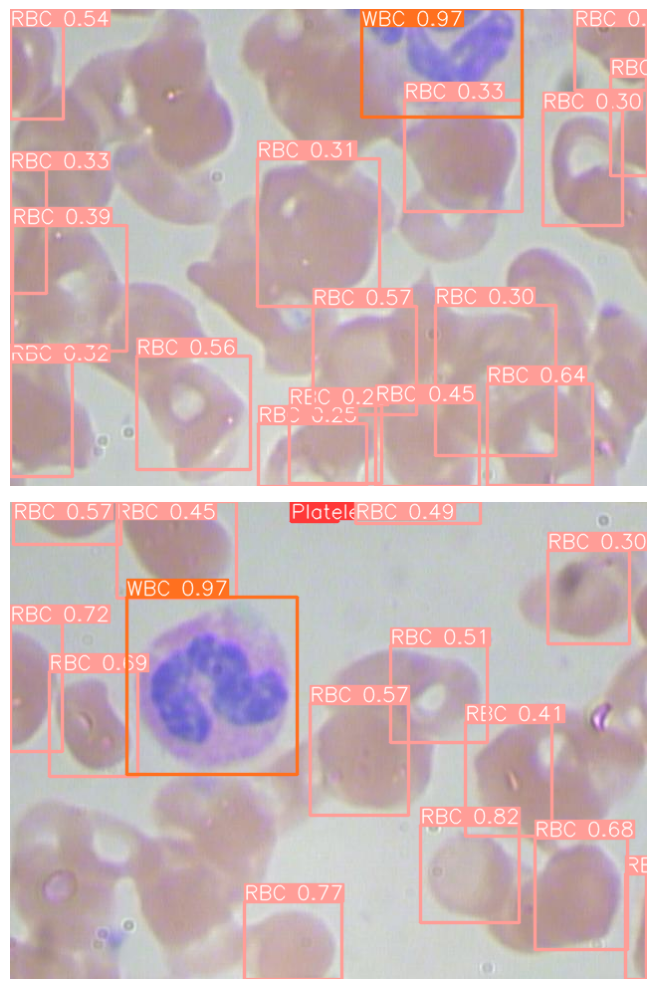

In [16]:
printYOLO(predictions)